## Project Objective
The goal of this assignment is to solve a business problem using text analysis by applying relevant
data collection, data manipulation, visualization, and machine learning techniques to generate
actionable insights and recommendations

## Business Problem
Our business problem will be focused on website content classification of text. We are a group of consultants, hired by breakingnews.ie tasked to analyse various articles coming in to their system and categorise them based on their existent sections that they have. Currently this is done manually by the staff, and the management wants to automate the process. So our team will work on a model that will achieve the same results reducing the time taken for the job manually. This will not only increase efficiency but also allows staff to put their labour into other areas.

### Steps followed to achieve the above objective
1. Importing libraries
2. Data Collection
3. Data Cleaning
4. Analysing the Dataset (summarized view of the data)
5. Data Preprocessing
6. Data Visualisation
7. Models Creation
8. Hypertuning the best model
9. Saving the models to a pickle file
10. Sample to Load the model and predicting value using the same
11.  Recommendation

## Importing Libraries
Below, libraries are installed which will be required in the further steps.

In [87]:
#
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np

#NlP related libraries
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer,PorterStemmer
nltk.download('punkt')

#for data vasualization
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning model related libraies
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
import pickle

#remove warning texts
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\78605\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\78605\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\78605\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Collection
The data sources will be focused on articles from breakingnews.ie, where we will be selecting articles from different categories such as Ireland, world, entertainment, lifestyle, sport, and business. Since these are the most popular categories on the website, we will be focusing on those. This will serve as the base for building our model. 

### **Recommendation**: For avoiding time to load data from all the websites, please run the code below the heading **Run this cell below to avoid web scrapping** 

In [2]:
# Article links in category lists, so they can be used for further analysis
Lifestyle=['https://www.breakingnews.ie/lifestyle/hay-fever-misery-this-pollen-season-expert-advice-for-prevention-and-treatment-1609754.html',
      'https://www.breakingnews.ie/lifestyle/frequent-flyers-share-their-best-plane-travel-hacks-1609749.html',
      'https://www.breakingnews.ie/lifestyle/5-new-books-to-read-this-week-124-1609523.html',
     'https://www.breakingnews.ie/lifestyle/immersive-production-of-12th-century-visionary-to-be-led-by-dublin-xr-production-studio-1609160.html',
     'https://www.breakingnews.ie/lifestyle/what-is-the-youngest-age-that-autism-can-show-up-in-children-1608865.html',
     'https://www.breakingnews.ie/lifestyle/5-spring-coat-trends-we-cant-wait-to-wear-1608511.html',
     'https://www.breakingnews.ie/lifestyle/stunning-church-style-donegal-property-could-be-your-own-slice-of-heaven-1606808.html',
      'https://www.breakingnews.ie/lifestyle/joe-wicks-its-important-to-teach-our-children-that-exercise-can-be-wonderful-and-fun-1607747.html',
      'https://www.breakingnews.ie/lifestyle/marilyn-monroe-dress-sells-at-auction-for-eight-times-estimate-1607573.html',
      'https://www.breakingnews.ie/lifestyle/rachel-riley-on-the-joy-of-reading-to-her-children-amid-the-hectic-juggle-of-family-life-1607501.html',
      'https://www.breakingnews.ie/lifestyle/could-you-have-hidden-visceral-fat-and-should-you-be-worried-about-it-1607482.html',
      'https://www.breakingnews.ie/lifestyle/experts-issue-warning-about-viral-tiktok-ear-cleaning-trend-1607460.html',
      'https://www.breakingnews.ie/lifestyle/gino-dacampos-pasta-salad-recipe-1607456.html',
      'https://www.breakingnews.ie/lifestyle/how-comedian-katherine-ryan-recovered-from-her-son-saying-her-cooking-tastes-like-dirt-1606682.html',
      'https://www.breakingnews.ie/lifestyle/shortlist-announced-for-one-of-uks-oldest-literature-competitions-1606627.html',
      'https://www.breakingnews.ie/lifestyle/gwyneth-paltrow-feels-impending-empty-nest-grief-how-to-prepare-for-your-kids-leaving-home-1606172.html',
      'https://www.breakingnews.ie/lifestyle/how-to-wear-springs-floaty-florals-trend-1605387.html',
      'https://www.breakingnews.ie/lifestyle/emily-ratajkowski-sets-new-trend-for-divorce-rings-1604926.html',
      'https://www.breakingnews.ie/lifestyle/first-brain-chip-patient-of-elon-musks-neuralink-shown-playing-online-chess-1604562.html',
      'https://www.breakingnews.ie/lifestyle/what-is-tiktoks-soft-travel-trend-and-why-is-it-becoming-so-popular-1602992.html']
Business=['https://www.breakingnews.ie/business/tesla-scraps-plans-for-low-cost-entry-model-amid-fierce-chinese-competition-1609888.html',
          'https://www.breakingnews.ie/business/apple-lays-off-more-than-600-in-first-major-round-of-post-pandemic-cuts-1609738.html',
         'https://www.breakingnews.ie/business/ryanair-to-resume-flights-to-israel-from-june-1609473.html',
         'https://www.breakingnews.ie/business/x-verified-badges-begin-appearing-on-influential-accounts-1609461.html',
         'https://www.breakingnews.ie/business/inflation-in-europe-falls-more-than-expected-to-2-4-1609000.html',
         'https://www.breakingnews.ie/business/google-to-delete-user-records-gathered-from-browser-private-mode-1608948.html',
         'https://www.breakingnews.ie/business/japanese-retailer-mujis-european-arm-set-to-call-in-administrators-1607198.html',
         'https://www.breakingnews.ie/business/households-brace-for-price-hike-monday-as-fuel-broadband-and-mobile-costs-set-to-rise-1607119.html',
         'https://www.breakingnews.ie/business/papa-johns-to-shut-43-underperforming-uk-restaurants-1606292.html',
         'https://www.breakingnews.ie/business/government-to-introduce-measures-to-help-struggling-businesses-1606256.html',
         'https://www.breakingnews.ie/business/boeing-chief-executive-dave-calhoun-to-step-down-1605921.html',
         'https://www.breakingnews.ie/business/eu-opens-competition-investigations-into-apple-google-and-meta-1605887.html',
         'https://www.breakingnews.ie/business/yuno-energy-announces-rate-cut-for-new-customers-1605827.html',
         'https://www.breakingnews.ie/business/foot-locker-loses-appeal-over-grafton-street-covid-lockdown-rent-1605273.html',
         'https://www.breakingnews.ie/business/trumps-social-media-company-to-go-public-after-merger-approved-1605226.html',
         'https://www.breakingnews.ie/business/newspaper-loses-appeal-over-tax-defaulter-article-1604348.html',
         'https://www.breakingnews.ie/business/two-marts-receive-financial-penalties-over-findings-of-improper-conduct-1604016.html',
         'https://www.breakingnews.ie/business/french-regulators-fine-google-213m-in-dispute-with-news-publishers-1603793.html',
         'https://www.breakingnews.ie/business/musk-defends-his-ketamine-use-as-beneficial-for-investors-in-new-video-1603326.html',
         'https://www.breakingnews.ie/business/tesco-loses-court-of-appeal-bid-over-lidl-yellow-circle-logo-1603294.html',]
Sport=["https://www.breakingnews.ie/sport/mauricio-pochettino-wants-to-build-genuine-relationship-with-chelsea-fans-1609788.html",
        "https://www.breakingnews.ie/sport/erik-ten-hag-manchester-uniteds-dropped-points-are-getting-more-expensive-1609763.html",
        "https://www.breakingnews.ie/sport/virgil-van-dijk-keen-to-spread-calmness-at-liverpool-during-title-run-in-1609759.html",
        "https://www.breakingnews.ie/sport/david-reidy-says-clare-do-not-have-enough-silverware-ahead-of-league-final-1609421.html",
        "https://www.breakingnews.ie/sport/toto-wolff-joins-mercedes-in-japan-after-recent-struggles-1609700.html",
        "https://www.breakingnews.ie/sport/mikel-arteta-tips-bukayo-saka-to-be-decisive-for-arsenal-on-injury-return-1609697.html",
        "https://www.breakingnews.ie/sport/cole-palmer-wants-penalty-pressure-after-inspiring-unlikely-chelsea-comeback-win-1609687.html",
        "https://www.breakingnews.ie/sport/soccer-no-other-sport-does-this-pundits-enthralled-by-chelsea-v-man-utd-thriller-2-1609664.html",
        "https://www.breakingnews.ie/sport/liv-casts-long-shadow-as-star-attraction-jon-rahm-mounts-masters-defence-1609656.html",
        "https://www.breakingnews.ie/sport/luke-littler-says-man-united-loss-inspired-him-to-win-premier-league-homecoming-1609614.html",
        "https://www.breakingnews.ie/sport/alexis-mac-allister-helps-liverpool-return-to-the-top-of-the-premier-league-1609585.html",
        "https://www.breakingnews.ie/sport/oleksandr-zinchenko-says-arsenal-can-compete-with-the-best-teams-in-the-world-1609532.html",
        "https://www.breakingnews.ie/sport/erik-ten-hag-realistic-about-man-utds-bid-to-qualify-for-champions-league-1609528.html",
        "https://www.breakingnews.ie/sport/gaa-preview-clare-face-kilkenny-in-hurling-league-decider-1609333.html",
        "https://www.breakingnews.ie/sport/phil-foden-v-wayne-rooney-how-do-the-two-players-compare-1609499.html","https://www.breakingnews.ie/sport/rio-ferdinand-marcus-rashford-may-have-to-make-big-decision-to-leave-man-utd-1609341.html",
              "https://www.breakingnews.ie/sport/lewis-hamilton-thinks-sebastian-vettel-could-be-a-good-fit-for-mercedes-1609306.html",
              "https://www.breakingnews.ie/sport/mikel-arteta-applauds-arsenal-after-rotation-pays-off-against-luton-1609302.html",
              "https://www.breakingnews.ie/sport/phil-foden-fires-man-city-to-victory-with-superb-hat-trick-against-aston-villa-1609258.html",
              "https://www.breakingnews.ie/sport/brentford-and-brighton-battle-to-goalless-draw-1609253.html"]

Ireland = ["https://www.breakingnews.ie/ireland/drugs-worth-260000-euro-found-hidden-in-bag-at-dublin-airport-1609931.html", "https://www.breakingnews.ie/ireland/man-charged-with-dangerous-driving-causing-death-of-nine-year-old-boy-1609921.html", "https://www.breakingnews.ie/ireland/simon-harris-pledges-to-be-mature-taoiseach-as-he-seeks-to-renew-his-party-1609913.html", "https://www.breakingnews.ie/ireland/former-rte-journalist-in-talks-about-running-in-european-elections-1609776.html", "https://www.breakingnews.ie/ireland/four-people-arrested-in-connection-with-arson-incident-in-galway-1607080.html",
                 "https://www.breakingnews.ie/ireland/new-transport-strategy-not-anti-motorist-says-ryan-1607083.html", "https://www.breakingnews.ie/ireland/man-and-woman-released-after-questioning-over-1992-mccormack-killing-1606994.html", "https://www.breakingnews.ie/ireland/more-than-80-of-medical-professionals-believe-early-abortion-training-should-be-mandatory-1605696.html", "https://www.breakingnews.ie/ireland/met-eireann-issues-yellow-rain-warning-for-five-counties-1605693.html", "https://www.breakingnews.ie/ireland/gardai-investigating-armed-robbery-at-waterford-bookmakers-1603662.html", "https://www.breakingnews.ie/ireland/varadkar-to-use-st-patricks-day-platform-to-lobby-us-on-gaza-ceasefire-support-1600384.html", "https://www.breakingnews.ie/ireland/un-human-rights-body-calls-for-repeal-or-amendment-of-troubles-legacy-laws-1607273.html", "https://www.breakingnews.ie/ireland/ireland-has-third-highest-level-of-deaths-on-rural-roads-in-eu-1607150.html", "https://www.breakingnews.ie/ireland/gardai-renew-appeal-for-information-on-31st-anniversary-of-annie-mccarrick-disappearance-1606289.html", "https://www.breakingnews.ie/ireland/simon-coveney-rules-himself-out-as-candidate-to-replace-leo-varadkar-1604429.html",
                 "https://www.breakingnews.ie/ireland/harris-wants-rte-reports-brought-to-cabinet-quickly-1609900.html", "https://www.breakingnews.ie/ireland/government-planning-to-accommodate-up-to-35000-asylum-seekers-by-2028-1606977.html", "https://www.breakingnews.ie/ireland/us-president-says-he-always-wants-to-come-back-to-ireland-1601937.html", "https://www.breakingnews.ie/ireland/malawi-aid-worker-faming-nation-faces-existential-threat-due-to-climate-change-1605639.html", "https://www.breakingnews.ie/ireland/noise-from-wind-farm-is-nuisance-to-neighbours-judge-says-in-landmark-ruling-1598717.html"]

World= ["https://www.breakingnews.ie/world/earthquake-interrupts-un-security-council-meeting-after-hitting-us-east-coast-1609905.html","https://www.breakingnews.ie/world/no-major-damage-or-injuries-reported-as-new-york-is-rocked-by-earthquake-1609898.html","https://www.breakingnews.ie/world/new-york-rattled-by-earthquake-with-magnitude-of-4-7-on-richter-scale-1609835.html","https://www.breakingnews.ie/world/update-1-magnitude-4-7-earthquake-hits-new-york-city-region-usgs-says-1609828.html","https://www.breakingnews.ie/world/ukraine-says-it-destroyed-russian-warplanes-in-one-of-its-biggest-drone-attacks-1609745.html","https://www.breakingnews.ie/business/apple-lays-off-more-than-600-in-first-major-round-of-post-pandemic-cuts-1609738.html",
"https://www.breakingnews.ie/world/biden-ultimatum-to-netanyahu-protect-gaza-civilians-or-else-1609712.html","https://www.breakingnews.ie/israel-hamas/israel-dismisses-two-officers-over-deadly-drone-strikes-on-aid-workers-in-gaza-1609704.html","https://www.breakingnews.ie/world/prisoners-win-fight-to-view-solar-eclipse-1609602.html","https://www.breakingnews.ie/world/judge-refuses-to-throw-out-trump-unclassified-documents-case-1609573.html","https://www.breakingnews.ie/israel-hamas/joe-biden-tells-israel-to-protect-aid-workers-and-reach-gaza-ceasefire-1609538.html","https://www.breakingnews.ie/world/pupils-wearing-pro-palestinian-badges-referred-to-counter-terror-scheme-union-1609555.html","https://www.breakingnews.ie/world/major-outages-as-us-states-are-battered-by-snow-rain-and-high-winds-1609536.html","https://www.breakingnews.ie/business/ryanair-to-resume-flights-to-israel-from-june-1609473.html","https://www.breakingnews.ie/business/x-verified-badges-begin-appearing-on-influential-accounts-1609461.html",
               "https://www.breakingnews.ie/ukraine/russia-launches-deadly-drone-attack-on-kharkiv-1609281.html","https://www.breakingnews.ie/world/bill-clinton-reflects-on-post-white-house-years-in-upcoming-memoir-citizen-1609334.html","https://www.breakingnews.ie/world/rescuers-search-for-people-trapped-after-earthquake-1609262.html","https://www.breakingnews.ie/world/rescuers-in-taiwan-search-for-missing-as-earthquake-death-toll-rises-to-10-1609317.html","https://www.breakingnews.ie/world/two-women-charged-after-videos-of-toddler-vaping-shared-online-1609082.html"]


Entertainment=["https://www.breakingnews.ie/entertainment/sacha-baron-cohen-and-isla-fisher-announce-divorce-1609985.html",
"https://www.breakingnews.ie/entertainment/bbc-responds-to-complaints-about-excessive-coverage-of-kates-cancer-diagnosis-1609939.html",
"https://www.breakingnews.ie/entertainment/popstar-nick-jonas-spotted-at-famous-dublin-restaurant-1609794.html",
" https://www.breakingnews.ie/entertainment/disney-will-crack-down-on-password-sharing-this-year-boss-says-1609791.html",
"https://www.breakingnews.ie/entertainment/michael-j-fox-open-to-acting-comeback-despite-retirement-1609681.html",
"https://www.breakingnews.ie/world/the-indian-in-the-cupboard-author-lynne-reid-banks-dies-aged-94-1609676.html",
"https://www.breakingnews.ie/entertainment/reese-witherspoons-company-to-produce-legally-blonde-spin-off-tv-series-1609646.html",
"https://www.breakingnews.ie/entertainment/suki-waterhouse-confirms-birth-of-first-child-with-robert-pattinson-1609643.html",
"https://www.breakingnews.ie/entertainment/sir-paul-mccartney-proud-as-he-praises-beyonces-version-of-blackbird-1609639.html",
"https://www.breakingnews.ie/entertainment/lulu-on-working-with-the-late-david-bowie-i-felt-like-id-been-heard-1609608.html",
"https://www.breakingnews.ie/entertainment/monty-python-stars-meeting-up-is-like-tearful-lovers-reuniting-michael-palin-1609487.html",
"https://www.breakingnews.ie/entertainment/victoria-and-the-last-kingdom-actor-adrian-schiller-dies-suddenly-aged-60-1609455.html",
"https://www.breakingnews.ie/entertainment/lara-croft-named-most-iconic-video-games-character-of-all-time-in-bafta-poll-1609310.html",
"https://www.breakingnews.ie/entertainment/christina-applegate-questioned-if-she-was-dying-during-ms-relapse-1609188.html",
"https://www.breakingnews.ie/entertainment/ruby-wax-people-ashamed-of-mental-health-struggles-are-not-worth-knowing-1609156.html",
"https://www.breakingnews.ie/entertainment/dakota-fanning-says-becoming-a-mother-is-more-important-than-acting-1609148.html",
"https://www.breakingnews.ie/world/carol-vorderman-to-publish-book-exploring-blatant-hypocrisy-of-tory-government-1609114.html",
"https://www.breakingnews.ie/entertainment/lizzo-insists-she-is-not-quitting-the-music-industry-1608996.html",
"https://www.breakingnews.ie/entertainment/rebel-wilson-claims-she-felt-sexually-harassed-by-co-star-sacha-baron-cohen-1608872.html",
"https://www.breakingnews.ie/entertainment/netflix-releases-new-trailer-for-dark-comedy-bodkin-set-in-ireland-1608804.html"]

Below is the function which is used for webscrapping the data

In [3]:
# Function for web scrapping
def scrap(urls):
    final_data=[]
    final_topics=[]
    for link in urls:
        #get content by sending request
        r = requests.get(link)
        #use beautifulsoup to scrape the data
        soup = BeautifulSoup(r.content, 'lxml')
        table = soup.find_all('article')
        cleaned_text = ''
        #Saving all the article paragraphs
        for item in table:
            for i in item.children:
                # print(i.name)
                if(i.name=='p'):
                    cleaned_text+=i.text
        final_data.append(cleaned_text)
    return final_data

Below we use the above created function to create a dataframe from the documents data

In [4]:
# Combining the links into one list
urls=[Lifestyle,Business,Sport,Ireland,World,Entertainment]

# Labeling the urls
labels=['Lifestyle','Business','Sports','Ireland','World','Entertainmet']

# Creating a dataframe
df2=pd.DataFrame([],columns=['Content','Labels'])
for i in range(len(urls)):
    data=scrap(urls[i])
    df1=pd.DataFrame(zip(data),columns=['Content'])
    df1['Labels']=labels[i]
    df2=pd.concat([df2,df1]).reset_index(drop=True)

In [6]:
df2.head()

,Content,Labels
0,With an estimated one in four people in Irelan...,Lifestyle
1,"With holidays becoming more of a luxury, it’s ...",Lifestyle
2,Our top book of the week is inspired by real e...,Lifestyle
3,"Algorithm, a Dublin-based award-winning XR pro...",Lifestyle
4,It’s the start of World Autism Acceptance Week...,Lifestyle


In [30]:
# Saving the dataset for further use
df2.to_csv('Extracted_content.csv')

### Run this cell below to avoid web scrapping data from all the wwebsites

In [107]:
# Extracting the data from the csv - basis for the following model building process
df2=pd.read_csv('Extracted_content.csv')
df2.head()

,Unnamed: 0,Content,Labels
0,0,with an estimated one in four people in irelan...,Lifestyle
1,1,with holidays becoming more of a luxury its im...,Lifestyle
2,2,our top book of the week is inspired by real e...,Lifestyle
3,3,algorithm a dublinbased awardwinning xr produc...,Lifestyle
4,4,its the start of world autism acceptance week ...,Lifestyle


## Data Cleaning

Below are the process that will be performed in the below code:
1. Remove unnamed:0 column as it's of no use
2. Removing links or Urls from the text of documents
3. Removing anything except white-spaces and alphanumerics
4. Checking for NA values and removing if any
5. Removing duplicate rows if any

In [108]:
# Dropping the first column as it's not of any use
df2=df2.drop("Unnamed: 0",axis=1)

In [109]:
# converting all text to lowercase
df2['Content']=df2['Content'].apply(lambda x:x.lower())
url_pattern = re.compile(r'https?://\S+')
url_pattern2 = re.compile(r'www.\S+')

# Define a function to remove URLs from text
def remove_urls(text):
    removed=url_pattern.sub('', text)
    return url_pattern2.sub('', removed)

# Using the function to remove the urls
df2['Content'] = df2['Content'].apply(remove_urls)

# Removing anything except white-spaces and alphanumerics
df2 = df2.replace(to_replace=r'[^\w\s]', value='', regex=True)

In [110]:
# Checking for null value
df2.isna().sum()

Content    0
Labels     0
dtype: int64

In [111]:
# Checking for duplicate values
print('Number of Duplicate rows:')
df2.duplicated().sum()

Number of Duplicate rows:


0

## Analysing the Dataset

In [112]:
#get columns information of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  120 non-null    object
 1   Labels   120 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [113]:
#group by dataset on Labels
df2.groupby('Labels').count().reset_index()

,Labels,Content
0,Business,20
1,Entertainmet,20
2,Ireland,20
3,Lifestyle,20
4,Sports,20
5,World,20


## Data Preprocessing
1. *Tokenization*: we will split the text into words or sub words units in order to represent text as numerical features. 
2. *Stop Word Removal*: elimination of common words since they can carry little meaning for document classifications tasks
3. *Lemmatization*: converts the word to its meaningful base form.

In [114]:
# Creating a function for preprocessing the text
def preprocess_text(text):
    #load english stop words
    stop_words = set(stopwords.words('english'))
    #create lemmetizer object
    lemmetizer=WordNetLemmatizer()
    words = nltk.word_tokenize(text.lower())
    #use the object to lemmatize the words
    words = [lemmetizer.lemmatize(w) for w in words if w not in stop_words]
    #join all the words
    return ' '.join(words)

#use the above function to preprocess the text
df2['Content'] = df2['Content'].apply(preprocess_text)

## Data Visualisation
Below we visualise the data to generate some insights to understand which are the top ten occurring words in each category. 

In [115]:
#group by data on labels
dv=df2.groupby('Labels').agg({'Content':'sum'}).reset_index()
dv

,Labels,Content
0,Business,tesla cancelled longpromised inexpensive car i...
1,Entertainmet,sacha baron cohen isla fisher announced filed ...
2,Ireland,man arrested 134 kilo drug seized dublin airpo...
3,Lifestyle,estimated one four people ireland experiencing...
4,Sports,mauricio pochettino admits risk join chelsea g...
5,World,48 magnitude earthquake u state new jersey int...


Let's generate the wordcloud to see the common words of each label

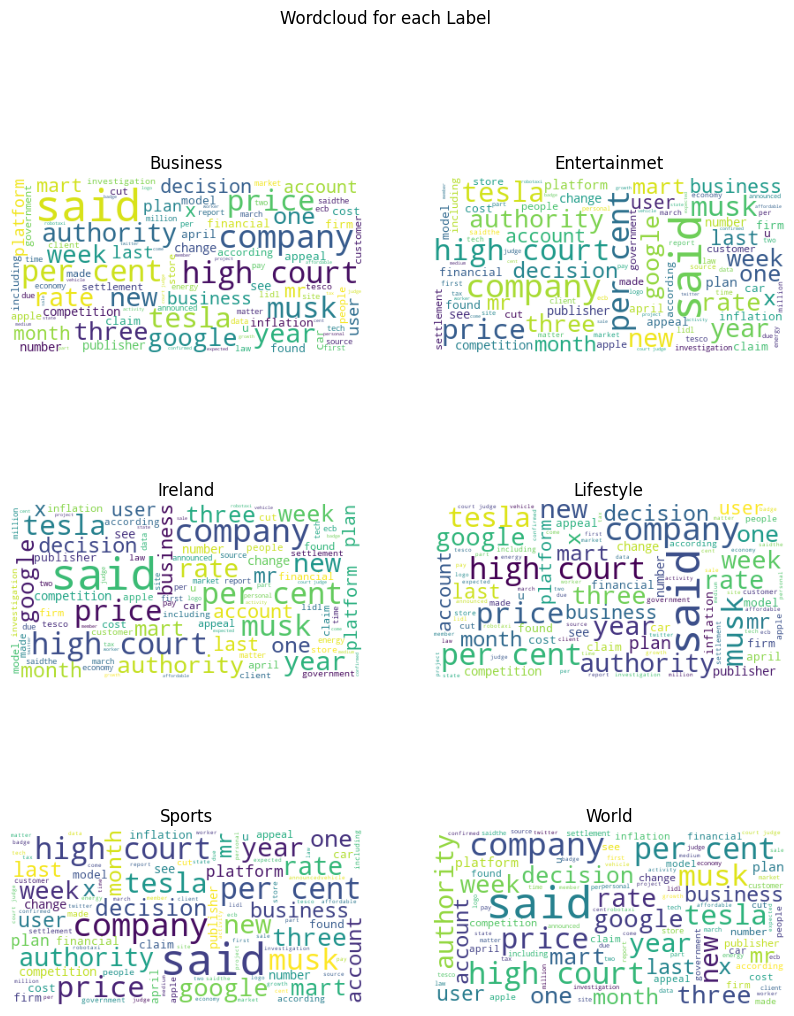

In [151]:
# loading the labels for using it for charts
labels=dv['Labels']
#Plotting wordcloud
#creating a figure to plot on
fig = plt.figure(figsize=(10,12))
fig.suptitle('Wordcloud for each Label')
for i in range(6):
    #add an empty plot
    ax = fig.add_subplot(3,2,i+1)
    #create wordcloud on the words of the texts for each label
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(dv['Content'][0])
    #show the plot
    ax.imshow(wordcloud)
    #setting a title for each
    ax.set_title(labels[i])
    #disable the axis
    ax.axis('off')

Let's analyse the top 10 words of each category

In [116]:
# Finding the top 10 occuring words for each label
word_freq=[]
for i in range(6):
    word_series = pd.Series(dv['Content'][i].split())
    word_freq.append(word_series.value_counts().head(10))

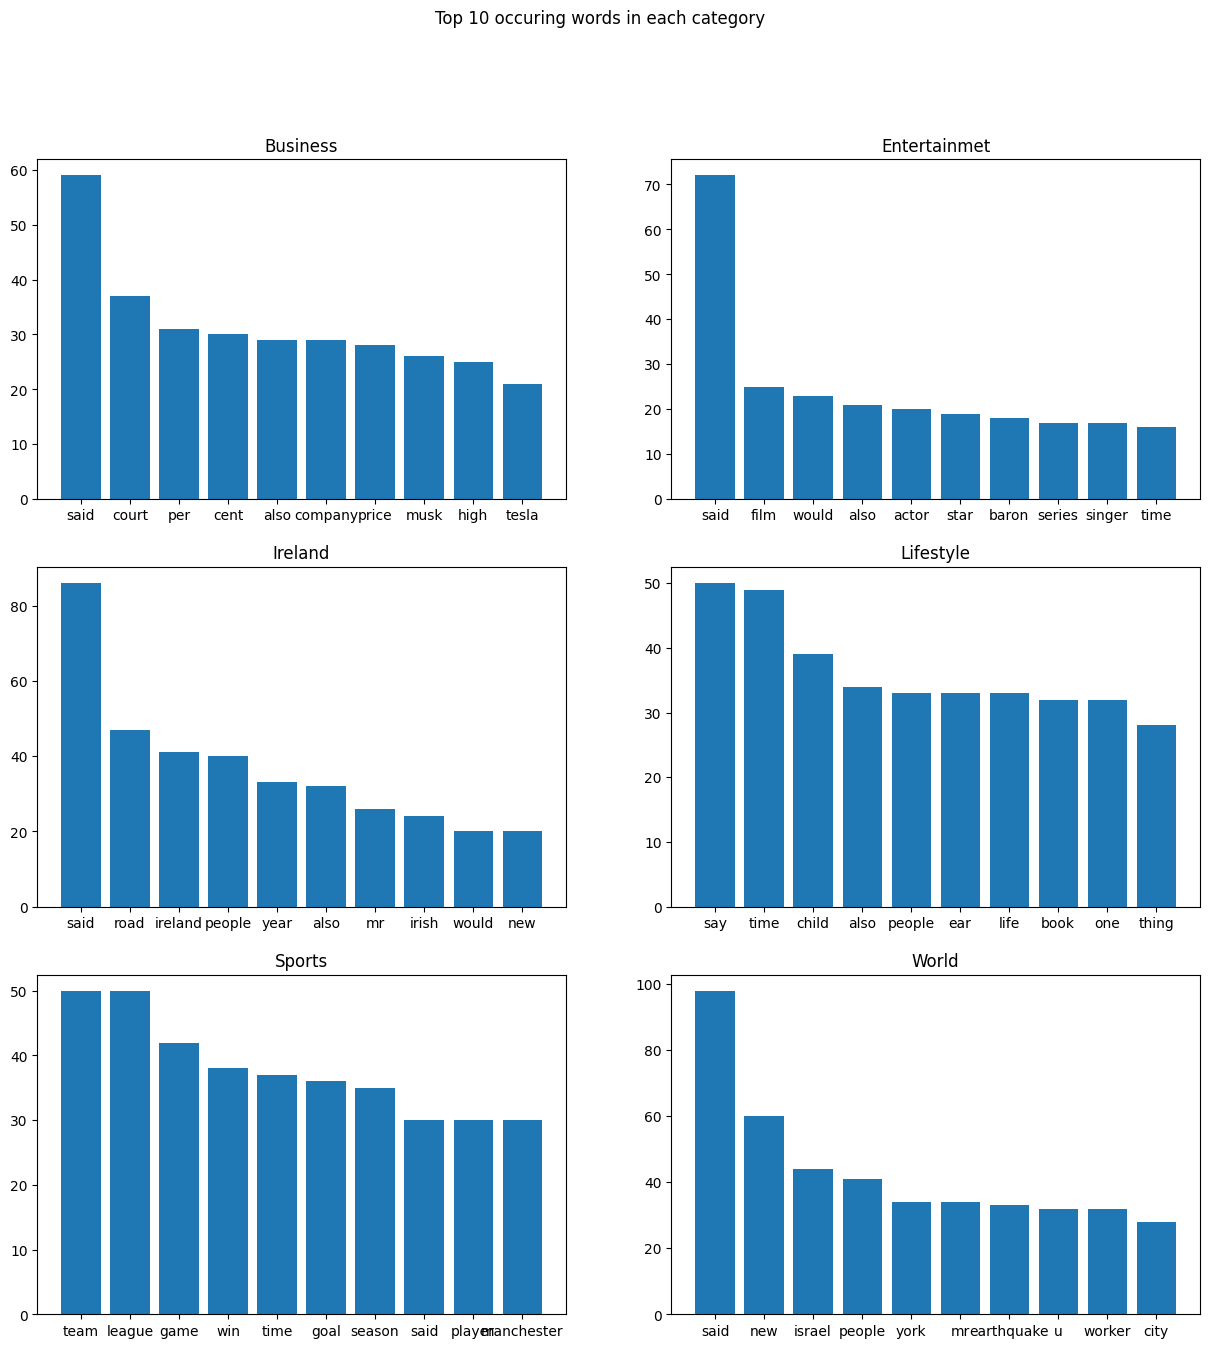

In [101]:
# Plotting the bar charts for top 10 words of each label

fig, axs = plt.subplots(3, 2,figsize=(15, 15))

# fig=plt.Figure(figsize=(40,50))
fig.suptitle("Top 10 occuring words in each category")
axs[0,0].bar(word_freq[0].index,word_freq[0].values)
axs[0,0].set_title(labels[0])
axs[0,1].bar(word_freq[1].index,word_freq[1].values)
axs[0,1].set_title(labels[1])
axs[1,0].bar(word_freq[2].index,word_freq[2].values)
axs[1,0].set_title(labels[2])
axs[1,1].bar(word_freq[3].index,word_freq[3].values)
axs[1,1].set_title(labels[3])
axs[2,0].bar(word_freq[4].index,word_freq[4].values)
axs[2,0].set_title(labels[4])
axs[2,1].bar(word_freq[5].index,word_freq[5].values)
axs[2,1].set_title(labels[5])
fig.show()

## Models Creation
We created custom categories obtained from the data sources, so our model will be based on document classification.

We'll use 4 different machine learning algorithms to create models
1. Random Forrest
2. Logistic Regression
3. Naive Bayes
4. K nearest neighbours

Before creating a model, we'll Vectorize the content using TfidVectorizer which Convert a collection of raw documents to a matrix of TF-IDF features.

In [133]:
#creating a vectorizer object
vectorizer = TfidfVectorizer(max_df=1.0)
#fitting and transforming the data using vectorizer
X = pd.DataFrame(vectorizer.fit_transform(df2['Content']).toarray())
y=df2['Labels']

below we create a dataframe which will store the scores of all the models which will help us to compare

In [134]:
# Creating dataframe to store scores of models
model_scores=pd.DataFrame([],columns=['Model_type','Accuracy'])

In [135]:
#train test split the data with balanced values for each category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [136]:
#creating the model's object
RF_model_1=RandomForestClassifier()

# Fitting the model according to the data
RF_model_1.fit(X_train,y_train)

# Predicting the values of test data
y_pred=RF_model_1.predict(X_test)

# Printing accuracy scores
print('Random Forrest:')
print('Accuracy Score:'+str(accuracy_score(y_test,y_pred)))

# Printing confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('*************')
print('\n')
model_scores.loc[len(model_scores)]=['Random Forrest',accuracy_score(y_test,y_pred)]

Random Forrest:
Accuracy Score:0.7083333333333334
Confusion Matrix
[[4 0 0 0 0 0]
 [0 3 0 1 0 0]
 [1 0 3 0 0 0]
 [2 0 0 2 0 0]
 [0 0 0 0 4 0]
 [1 0 2 0 0 1]]
*************




In [137]:
#creating the model's object
LR_model_1=LogisticRegression(max_iter=3000)

# Fitting the model according to the data
LR_model_1.fit(X_train,y_train)

# Predicting the values of test data
y_pred=LR_model_1.predict(X_test)

# Printing accuracy scores
print('Logistic Regression:')
print('Accuracy Score:'+str(accuracy_score(y_test,y_pred)))

# Printing confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('*************')
print('\n')
model_scores.loc[len(model_scores)]=['Logistic Regression',accuracy_score(y_test,y_pred)]

Logistic Regression:
Accuracy Score:0.875
Confusion Matrix
[[4 0 0 0 0 0]
 [0 3 0 1 0 0]
 [0 0 4 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 4 0]
 [1 0 1 0 0 2]]
*************




In [138]:
#creating the model's object
NB_model_1=GaussianNB()

# Fitting the model according to the data
NB_model_1.fit(X_train,y_train)

# Predicting the values of test data
y_pred=NB_model_1.predict(X_test)

# Printing accuracy scores
print('GaussianNB')
print('Accuracy Score:'+str(accuracy_score(y_test,y_pred)))

# Printing confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('*************')
print('\n')
model_scores.loc[len(model_scores)]=['GaussianNB',accuracy_score(y_test,y_pred)]

GaussianNB
Accuracy Score:0.7916666666666666
Confusion Matrix
[[3 0 1 0 0 0]
 [0 3 1 0 0 0]
 [0 0 4 0 0 0]
 [0 1 0 3 0 0]
 [0 0 0 0 4 0]
 [1 0 0 1 0 2]]
*************




In [139]:
#creating the model's object
KNN_model_1=KNeighborsClassifier(3)

# Fitting the model according to the data
KNN_model_1.fit(X_train,y_train)

# Predicting the values of test data
y_pred=KNN_model_1.predict(X_test)

# Printing the accuracy score
print('K Nearest Neighbor:')
print('Accuracy Score:'+str(accuracy_score(y_test,y_pred)))

# Printing the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('*************')
print('\n')
model_scores.loc[len(model_scores)]=['KNN',accuracy_score(y_test,y_pred)]

K Nearest Neighbor:
Accuracy Score:0.875
Confusion Matrix
[[4 0 0 0 0 0]
 [0 3 0 1 0 0]
 [0 0 4 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 4 0]
 [1 1 0 0 0 2]]
*************




In [140]:
# Displaying the accuracy scores from highest to lowest
model_scores.sort_values('Accuracy',ascending=False)

,Model_type,Accuracy
1,Logistic Regression,0.875000
3,KNN,0.875000
2,GaussianNB,0.791667
0,Random Forrest,0.708333


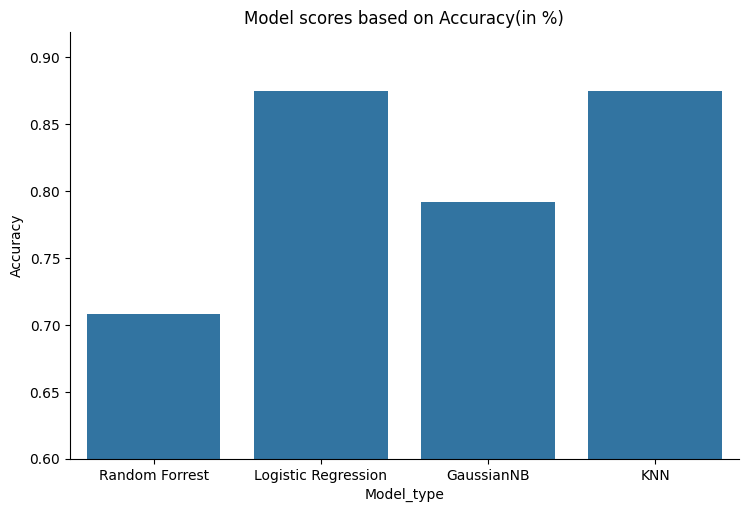

In [141]:
#plot the accuracy of each model
fig=sns.catplot(model_scores,y='Accuracy',x='Model_type',kind='bar',height=5,aspect=1.5).set(title='Model scores based on Accuracy(in %)')
fig.set(ylim=(0.6))

**Logistic Regresssion** is the best model with the **highest accuracy**.

## Hypertuning the best model

Using the top model input (**Logistic Regression**), below we perform a grid search to identify the best parameters

In [142]:
#setting different parameters for grid search
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
#running the grid search for the best model
LR_grid=GridSearchCV(LR_model_1,grid,cv=10)
LR_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=3000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [143]:
#print the best parameters and accuracy
print('Best hyperparameters are: '+str(LR_grid.best_params_))
print('Best score is: '+str(LR_grid.best_score_))
pred=LR_grid.predict(X_test)
print('Accuracy Score:')
print(accuracy_score(pred,y_test))

Best hyperparameters are: {'C': 10.0, 'penalty': 'l2'}
Best score is: 0.8233333333333335
Accuracy Score:
0.875


The best accuracy we're getting is **87.5%** using hypertuning of **Logistic Regression** model

## Saving the models to a pickle file
Below we'll save the best grid search model along with other algorithms best model for reusability in future.

In [144]:
# Save the grid search random forrest model as a pickle file
model_pkl_file = "LR_model_grid.pkl"  
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(LR_grid, file)


#### Below code can be used to load the saved model

In [145]:
#loading the model from storage
LR_grid = pickle.load(open(model_pkl_file, 'rb'))

## Sample to Load the model and predicting value using the same

Below is an example of how the article text can be passed through the model to predict the category of the article

In [146]:
#creating the functions to preprocess the text and pass it through the model
def get_category(content,tfid,model):
    d=content.lower()
    lem=preprocess_text(d)
    X = pd.DataFrame(tfid.transform([lem]).toarray())
    try:
        predicted=model.predict(X)
    except:
        lem+=' '.join(lem)
        X = pd.DataFrame(tfid.transform(lem).toarray())
        predicted=model.predict(X)
    return predicted


In [149]:
#article which will be classified into a category (this article data is of the category Ireland on the website and is not available in the dataset used to train).
content='''ESB Networks said its crews are working to restore power to all customers as soon as possible amid damage done by Storm Kathleen.

Twelve thousand homes and businesses are still without electricity this evening after Storm Kathleen made landfall earlier.

Atlantic coastal counties were worst affected - with a nationwide status yellow wind warning expiring at 8pm.

A yellow warning for wind takes effect for Donegal, Mayo and West Galway at 8pm this evening.

Met Éireann forecaster Brandon Creagh said warnings will remain in place for some counties.

Mr Creagh told Newstalk: "We've had gusts of over 100km/h in Cork, 109km/h near Sherkin Island and up to 85 mean wind speed in Roche's Point, with Galway and Mayo getting gusts over 110km/h respectively.

"The ones that are the nearest to coasts get the strongest wind speeds."'''

In [150]:
#get the predicted output in a variable 
output=get_category(content,vectorizer,LR_grid)
print("The article's category is: ")
print(output[0])

The article's category is: 
Ireland


## Recommendation
After testing our model with a link, it provided us with the correct label. 
Sometimes articles could be in more than one category (e.g. Ireland is winning a Rugby world cup game), and the model will classify it depending on the way the article is written (more sports focused, or more Ireland focused).
breakingnews.ie can now use our model for their article classification and will save time and resources which was previously done using manual efforts.

The model that we have build takes the article as an input and it will be automatically classified into one of breakingnews.ie's categories.
